## 1. Classification with KNN:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier        #분류예측, regression은 회귀
from sklearn import metrics, preprocessing
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

### 1.1. Read in data:

The data and explanation can be found [here](https://www.kaggle.com/c/titanic/data) (requires sign in).

In [2]:
os.chdir(r'C:\Users\Gram\Desktop\myPyCode\04 머신러닝 - 실습\data')               

In [3]:
df = pd.read_csv('data_titanic.csv', header='infer')   #타이타닉 데이터

In [4]:
df.shape

(891, 12)

In [5]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [22]:
df

,Embarked_Q,Embarked_S,Sex_male,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,SibSp_1,...,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Pclass_2,Pclass_3,"Age_(21.0, 30.0]","Age_(30.0, 35.0]","Age_(35.0, 80.0]",Survived
0,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
887,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
889,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


### 1.2. Missing value processing: 결측치 처리

In [6]:
#결측치 확인
df.isnull().sum(axis=0)   #age에 177개 결측치 존재

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#이름가지고 성인이냐 아니냐를 유추해 결측치에 연령넣음
n = df.shape[0]
Age = []                                                               # A temporary list.
for i in range(n):
    if np.isnan(df.Age[i]):
        if ('Mr' in df.Name[i]) or ('Mrs' in df.Name[i]) :    #Mr. or Mrs가 이름안에 있으면 age는 30
            Age.append(30)                                        
        else:                                                 #그게 아니면 10
            Age.append(10)                                       
    else:
        Age.append(df.Age[i])     #결측치아니면 그냥 둠  
df.Age = pd.Series(Age)


In [8]:
#불필요한 열 삭제
df = df.drop(columns = ['PassengerId','Name','Ticket','Fare','Cabin'])
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S


In [9]:
# Delete the rest of missing values.
df=df.dropna(axis=0)
df.shape

(889, 7)

In [10]:
df.shape

(889, 7)

### 1.3. Exploratory data analysis: 데이터별 시각화

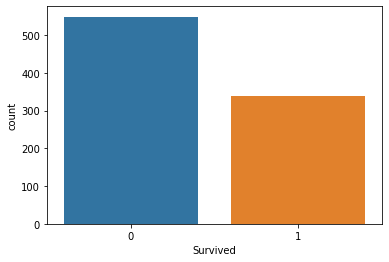

In [11]:
#생존 여부
sns.countplot('Survived',data=df)
plt.show()

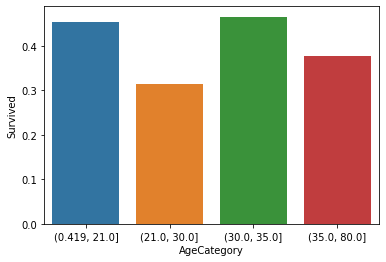

In [12]:
#연령대를 4개군으로 쪼갬
df['AgeCategory'] = pd.qcut(df.Age,4)                         # Using quantiles cut into 4 intervals.
sns.barplot(x='AgeCategory',y='Survived', ci=None, data=df)
plt.show()


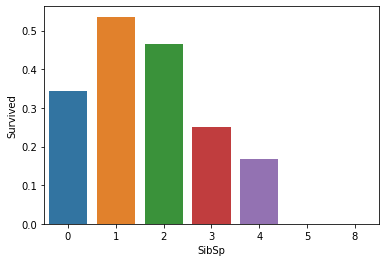

In [13]:
#동승자 수(형재자매나 배우자)수 별 생존율
sns.barplot(x='SibSp', y='Survived', ci=None, data=df)
plt.show()

#형제자매나 배우자가 1명인 경우 많이 살아남음
#동승한 사람 많을수록 죽음

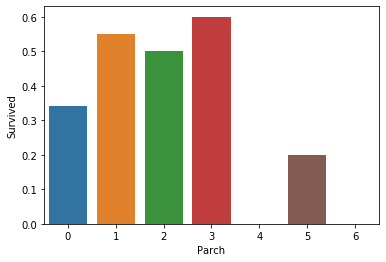

In [14]:
#동승자 수(부모나 자녀)수 별 생존율
sns.barplot(x='Parch', y='Survived', ci=None, data=df)
plt.show()

#부모나 자녀가 5명인 경우 생존율 적음

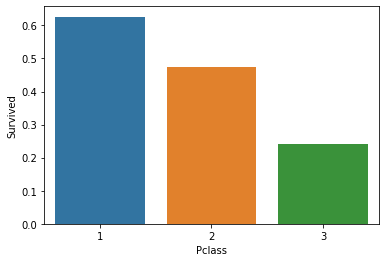

In [15]:
#좌석등급별 생존율
sns.barplot(x='Pclass', y='Survived', ci=None, data=df)
plt.show()


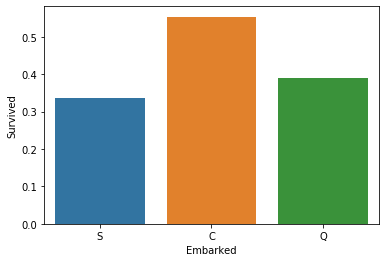

In [16]:
#승선장소별 생존율
sns.barplot(x='Embarked', y='Survived', ci=None, data=df)
plt.show()

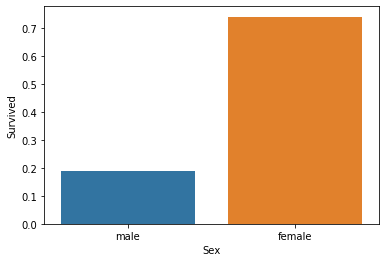

In [17]:
#남녀별 생존율
sns.barplot(x='Sex', y='Survived', ci=None,  data=df)
plt.show()

### 1.4. Feature engineering:

In [18]:
#더미변수로 변환 한 다음 원래 변수를 제거
df = pd.get_dummies(df.AgeCategory, drop_first=True,prefix='Age').join(df.drop(columns=['Age','AgeCategory']))
df = pd.get_dummies(df.Pclass, drop_first=True,prefix='Pclass').join(df.drop(columns=['Pclass']))
df = pd.get_dummies(df.SibSp, drop_first=True,prefix='SibSp').join(df.drop(columns=['SibSp']))
df = pd.get_dummies(df.Parch, drop_first=True,prefix='Parch').join(df.drop(columns=['Parch']))
df = pd.get_dummies(df.Sex, drop_first=True,prefix='Sex').join(df.drop(columns=['Sex']))
df = pd.get_dummies(df.Embarked, drop_first=True,prefix='Embarked').join(df.drop(columns=['Embarked']))
df.head(5)

#age,pclass~데이터는 수치형이기도 하지만 유형을 나타냄(명목형변수로 인지해 더미변수화 함)

,Embarked_Q,Embarked_S,Sex_male,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,SibSp_1,...,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Pclass_2,Pclass_3,"Age_(21.0, 30.0]","Age_(30.0, 35.0]","Age_(35.0, 80.0]",Survived
0,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [25]:
# Save to an external file.
df.to_csv('data_titanic_2.csv',index=False)  #타이타닉2에 더미변수화한 데이터 저장

In [26]:
df = pd.read_csv('data_titanic_2.csv', header='infer')  

In [28]:
df

,Embarked_Q,Embarked_S,Sex_male,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,SibSp_1,...,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Pclass_2,Pclass_3,"Age_(21.0, 30.0]","Age_(30.0, 35.0]","Age_(35.0, 80.0]",Survived
0,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
885,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
886,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
887,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


### 1.5. KNN train and test:

In [29]:
X = df.drop(columns=['Survived'])
Y = df.Survived

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(622, 20)
(267, 20)
(622,)
(267,)


In [32]:
# KNN with n_neighbours = 5 (k=5)
knn5 = KNeighborsClassifier(n_neighbors=5)     #k=5인 객체 만듬
knn5.fit(X_train, Y_train);
Y_pred = knn5.predict(X_test)
print(metrics.confusion_matrix(Y_test,Y_pred)) #(실제 Y, 예측 Y)
print("------------------------")
print( "Accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

#80%

[[139  19]
 [ 34  75]]
------------------------
Accuracy : 0.801


In [33]:
# KNN with n_neighbours = 100 (k=100)
knn100 = KNeighborsClassifier(n_neighbors=100)
knn100.fit(X_train, Y_train);
Y_pred = knn100.predict(X_test)
print(metrics.confusion_matrix(Y_test,Y_pred))
print("------------------------")
print( "Accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

#77%

[[155   3]
 [ 56  53]]
------------------------
Accuracy : 0.779


### 1.6. KNN bias-Variance tradeoff as function of *k*: 

In [34]:
#k를 1~100까지 변경시키면서 정확도 그려봄
accs = []
k_grid = range(1,100,1)
for k in k_grid:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accs.append(metrics.accuracy_score(Y_test,Y_pred))

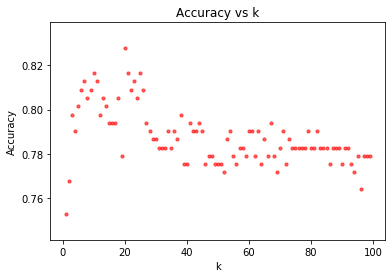

In [35]:
#시각화
plt.scatter(k_grid,accs,c='red',marker='o',s=10,alpha=0.6)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()

#정확도가 증가하다가 감소하는 모양
#최적값은 0~50 

### 1.7. KNN hyperparameter optimization:

In [36]:
# Parameter grid.
k_grid = np.arange(1,51,1)
parameters = {'n_neighbors':k_grid}   #parameters라는 딕셔너리 만듬

In [37]:
#k를 최적화
gridCV = GridSearchCV(KNeighborsClassifier(), parameters, cv=10, n_jobs = -1)       
#GridSearchCV함수사용: 클래스객체생성, 파라미터(딕셔너리), 케이폴드에서 10개, 모든 CPU 코어를 쓰라 
gridCV.fit(X_train, Y_train)
best_k = gridCV.best_params_['n_neighbors']  #best_params_딕셔너리에서 n_neighbors 뽑아옴
print("Best k : " + str(best_k))

Best k : 10


In [38]:
#베스트 k넣어 최종예측
KNN_best = KNeighborsClassifier(n_neighbors=best_k)
KNN_best.fit(X_train, Y_train)
Y_pred = KNN_best.predict(X_test)
print( "Best Accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

#결과가 조금 향상됨

Best Accuracy : 0.816
